# Gaza-fatality in war 2023 data analysis

### Gael Eduardo Pérez Gómez - A01753336

En este notebook vamos a analizar la evolución diaria del número de personas fallecidas de acuerdo al dataset seleccionado. 

## Contexto del dataset

Este Dataset encontrado en Kaggle fue proporcionado por el Ministerio de Salud de Gaza. El objetivo de este datset es analizat el costo humano del genocidio de Israel en Palestina.

In [34]:
#Importamos librerias
import pandas as pd
import matplotlib.pyplot as plt

El atributo que se medirá es el número de personas fallecidas diariamente (Daily Killed Persons) . Este dato está disponible en la columna Daily Killed Persons del dataset.

In [35]:
#Leemos el dataset extrayendolo de su archivo
df = pd.read_csv('gaza.csv')

#Imprimimos el dataset
print(df.head()) 

#Mostramos el arreglo de las muertes diarias
daily_killed = df['Daily Killed Persons'].values
print("Muertes diarias:")
print(daily_killed)

         Date Cumulative Killed Persons Cumulative Injured Persons  \
0  07-10-2023                       232                      1,697   
1  08-10-2023                       370                      2,200   
2  09-10-2023                       560                      2,900   
3  10-10-2023                       900                      4,250   
4  11-10-2023                     1,100                      5,339   

   Daily Killed Persons Daily Injured Persons  
0                   232                 1,697  
1                   138                   503  
2                   190                   700  
3                   340                 1,350  
4                   200                 1,089  
Muertes diarias:
[232 138 190 340 200 317 483 328 442 138 192 478 307 352 248 266 436 704
 756 481 298]


Para graficar la frecuencia de los decesos, utilizaremos un histograma. El histograma nos permitirá visualizar la distribución de los datos y compararla con distribuciones conocidas de probabilidad.

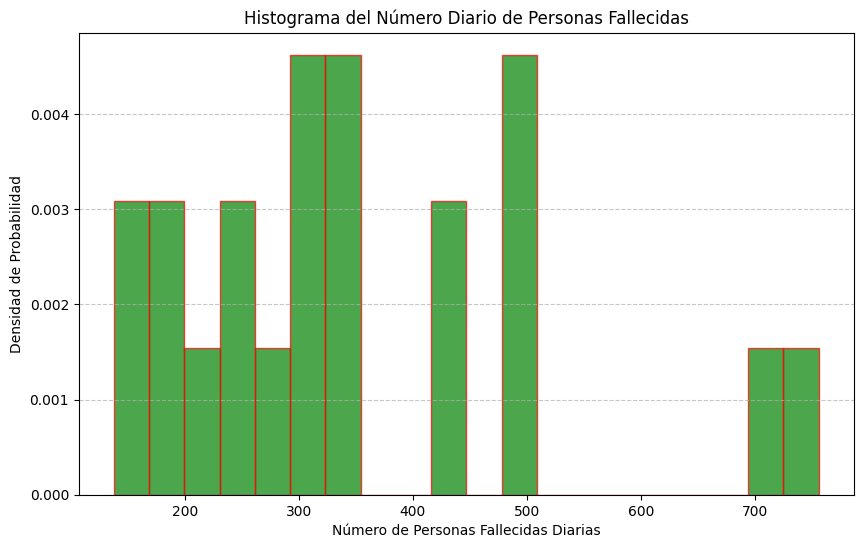

In [36]:
plt.figure(figsize=(10, 6))
hist, bins, _ = plt.hist(daily_killed, bins=20, edgecolor='Red', color='Green', density=True, alpha=0.7)
bin_centers = (bins[:-1] + bins[1:]) / 2

plt.title('Histograma del Número Diario de Personas Fallecidas')
plt.xlabel('Número de Personas Fallecidas Diarias')
plt.ylabel('Densidad de Probabilidad')
plt.grid(axis='y', linestyle='--', alpha=0.7)

Ahora procederemos a analizar que distribución es esta

In [37]:
#importamos librerías
from scipy.stats import poisson, norm, expon, gamma
from scipy.optimize import curve_fit
import numpy as np

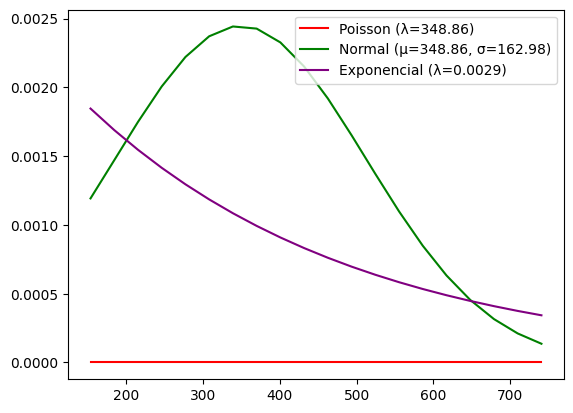


Parámetros ajustados:
Poisson: λ = 348.86
Normal: μ = 348.86, σ = 162.98
Exponencial: λ = 0.0029


In [38]:
# 5. Ajustamos las distribuciones usando SciPy
# Ajuste Poisson
lambda_poisson = np.mean(daily_killed)  # Parámetro λ de la distribución Poisson
poisson_fitted = poisson.pmf(bin_centers, mu=lambda_poisson)
plt.plot(bin_centers, poisson_fitted, label=f'Poisson (λ={lambda_poisson:.2f})', color='red')

# Ajuste Normal
mu_normal, sigma_normal = norm.fit(daily_killed)
normal_fitted = norm.pdf(bin_centers, loc=mu_normal, scale=sigma_normal)
plt.plot(bin_centers, normal_fitted, label=f'Normal (μ={mu_normal:.2f}, σ={sigma_normal:.2f})', color='green')

# Ajuste Exponencial
lambda_expon = 1 / np.mean(daily_killed)  # Parámetro λ de la distribución Exponencial
expon_fitted = expon.pdf(bin_centers, scale=1/lambda_expon)
plt.plot(bin_centers, expon_fitted, label=f'Exponencial (λ={lambda_expon:.4f})', color='purple')

# 6. Mostramos la leyenda y el gráfico
plt.legend()
plt.show()

# 7. Imprimimos los parámetros de las distribuciones ajustadas
print(f"\nParámetros ajustados:")
print(f"Poisson: λ = {lambda_poisson:.2f}")
print(f"Normal: μ = {mu_normal:.2f}, σ = {sigma_normal:.2f}")
print(f"Exponencial: λ = {lambda_expon:.4f}")

## Conclusiones

Distribución Poisson :
    La representación gráfica no es adecuada debido a que la distribución Poisson es discreta y no se adapta bien a la visualización continua de nuestri histograma.

Distribución Normal:
    El pico de la curva Normal coincide con la región donde los datos están más concentrados, y su forma simétrica refleja la dispersión observada en los datos y parece ser la que mejor se ajusta a estos. Se puede sugerir que los datos se aproximan mejor a una forma normal.

Distribución Exponencial:
    Los datos no muestran una tendencia exponencial descendente, por lo que esta distribución no captura bien la naturaleza de los datos.

Por lo que para nuestros datos podemos concluir que se ajustan más a una distribución Normal, seguidos por una de Poisson y muy alejados de una exponencial.


¿Cuántos sueños se han perdido en este genocidio? ¿Cuántas familias se han separado? ¿Cuántas historias de amor, de desamor, de triunfos y derrotas quedaron inconclusas? ¿Es justo que todas estas vidas humanas ahora sean una cifra?

Nuestro análisis revela que un promedio de 349 personas fallecen cada día a causa de este conflicto, 349 personas que sus familiares no volverán a abrazar.

La variabilidad en los datos (σ=162.98) demuestra que algunos días son más devastadores que otros, pero cada día alguien no volverá a ver a la persona que más ama en el mundo, no volverá a verle sonreir, escucharle cantar o verle bailar.

La situación de este genocidio es alarmante, a diario cientos de personas inocentes están siendo asesinadas para fines políticos y económicos. ¿Quién decide que vidas valen más que otras? ¿Por qué el mundo les compra esta idea? 

Estos datos no especifican como fallecieron estas personas, pero lo que es un hecho, es que la indiferencia del mundo entero ante esta situación ha sido responsable de cada una de esas muertes en vano. 

En un sistema económico al que solo le interesa generar utilidades para los más ricos, le es indiferente los medios para lograr generar plusvalía. ¿Cuánto cuesta una vida humana? Esta es una pregunta a la que este sistema deshumanizado podría responder en cuestión de segundos, pero, ¿Las personas a cargo podrían ponerle un costo a su propia vida, a la de sus hijxs, madres, padres, parejas, amistades? y ¿Por qué una vida sería más o menos valiosa que otra? ¿No todxs tenemos los mismos derechos humanos para desarrollarnos plenamente y vivir esta experiencia humana al máximo?

Es importante que la comunidad internacional se alce ante este genocidio, que se priorice la vida sobre los intereses económicos. Por medio de la educación, empatía y acción se cree un mundo donde cada vida sea valiosa, El 

Desde el río hasta el mar.

Fuente del Dataset:

https://www.kaggle.com/datasets/goudacs50/gaza-fatality-in-war-2023-data-analysis?resource=download

Repositorio de github:

https://github.com/gatitoenamorado/Gaza-fatality-in-war-2023-data-analysis